The dataset has information regarding iFood's customers, such as:

* Customers profiles;
* Products preferences;
* Marketing campaign successes and failures;
* Channel performance.

The marketing team is looking for attract more customers. First of all, they suspect that people without kids spend more than people with children. With that in mind, the marketing team is planning to run campaigns focusing on the group of people that has children. However, they are unsure if that hypothesis is true and we need to prove that these groups have different spending on average. 

    1. Sort people in two different groups 'with kids' and 'without kids'. Compare the average spending amount between these groups.
     
After that, within the group with kids, compare the groups of people with different number of children. The marketing team asked us to examine whether there are differences in the spending amount for those with 1, 2, 3 or more children. That way, they can narrow the campaign even more.

    2. Are there differences of average spending amount between these groups? Which of them has the lower average?

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy import stats
import pingouin as pg 

In [2]:
data = pd.read_csv('datasets/mkt_data.csv', )

In [3]:
data.head()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407


In [4]:
data.columns

Index(['Unnamed: 0', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'marital_status', 'education_level', 'kids',
       'expenses'],
      dtype='object')

In [5]:
# changing index column name
data = data.rename(columns={'Unnamed: 0':'row_number'})

In [6]:
print(f'Number of rows: {data.shape[0]}')
print(f'Number of columns: {data.shape[1]}')

Number of rows: 2205
Number of columns: 44


In [7]:
data.duplicated().sum()

0

In [8]:
data.isna().sum()

row_number                 0
Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Age                        0
Customer_Days              0
marital_Divorced        1975
marital_Married         1351
marital_Single          1728
marital_Together        1637
marital_Widow           2129
education_2n Cycle      2007
education_Basic         2151
education_Grad

In [9]:
# Adding the column 'have_kids' 
data['have_kids'] = np.where(data['kids'] == 0, 0, 1)

# Exploratory Data Analysis

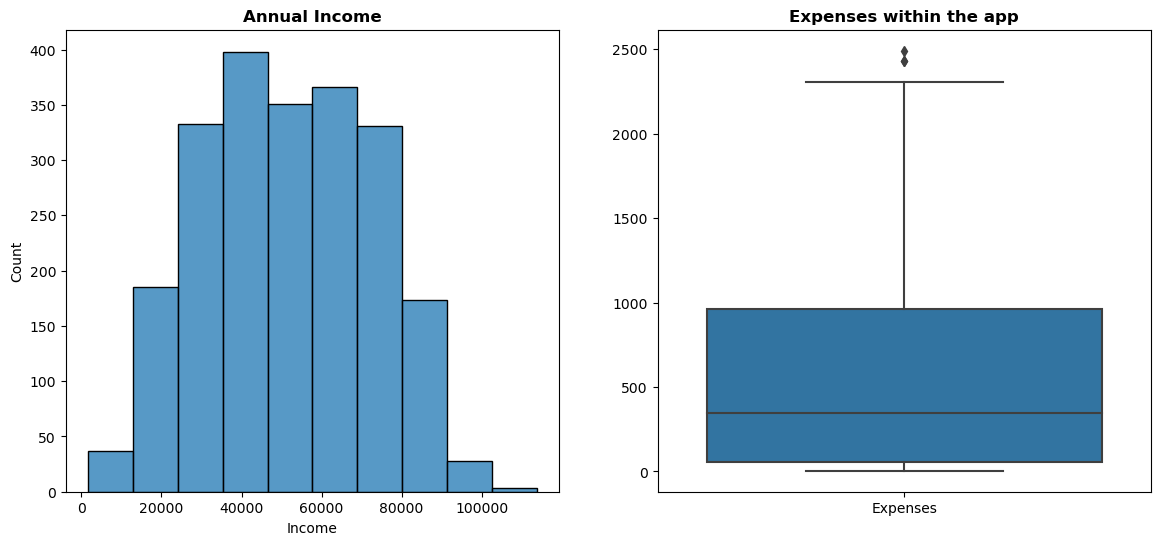

In [10]:
# plotting graphs with annual income and expenses within the app
fig = plt.figure(figsize=(14,6))

specs = gridspec.GridSpec(ncols=2, nrows=1,figure=fig)

ax1 = fig.add_subplot( specs[0,0]) # First row, first column
ax2 = fig.add_subplot( specs[0,1]) # First row, second column 

graph_1 = sns.histplot(data=data['Income'], bins = 10, ax=ax1)
graph_1.set_title("Annual Income", fontweight='bold')

graph_2 = sns.boxplot(data=data['expenses'], ax=ax2)
graph_2.set_xticklabels(['Expenses'])
graph_2.set_title("Expenses within the app", fontweight='bold')

plt.show()

* The Income histogram looks like a normal distribution, yet data between 5k and 8k has a fluctuation before the curve continues.

* When we observe the boxplot with expenses data, we can conclude that data are more concentrated untill Q2 and after Q2 data are more disperse.

In [11]:
# creating dataframe with education level count
education_level = data[['education_level', 'row_number']].groupby('education_level').nunique().reset_index()
education_level.rename(columns={'row_number':'count'}, inplace=True)
education_level

,education_level,count
0,2n Cycle,198
1,Basic,54
2,Graduation,1113
3,Master,364
4,PhD,476


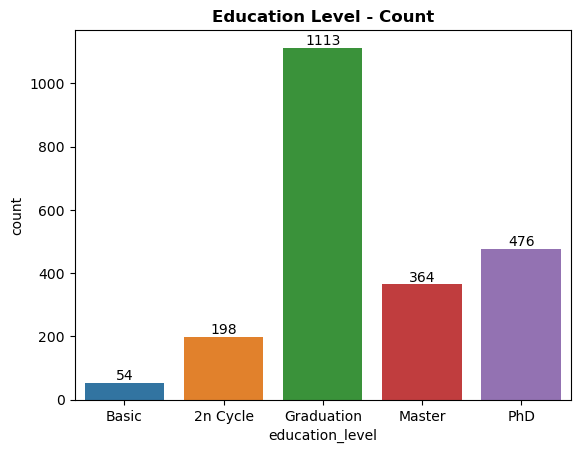

In [47]:
# plotting education level count
ed_level_graph = sns.barplot(data=education_level, x='education_level', y='count', 
                             order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'])
ed_level_graph.set_title("Education Level - Count", fontweight='bold')

for i in ed_level_graph.containers:
    ed_level_graph.bar_label(i,)

The majority of people has a bachelor or higher grade.

In [13]:
# creating dataframe with count of people and their respective number of children
kids = data[['kids', 'row_number']].groupby('kids').nunique().reset_index()
kids.rename(columns={'row_number':'count'}, inplace=True)
kids

,kids,count
0,0,628
1,1,1112
2,2,415
3,3,50


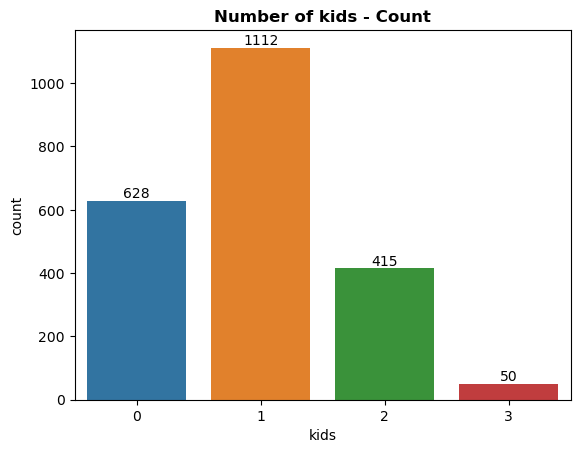

In [48]:
# plotting graph with count of people per number of kids
kids_graph = sns.barplot(data=kids, x='kids', y='count')
kids_graph.set_title("Number of kids - Count", fontweight='bold')

for i in kids_graph.containers:
    kids_graph.bar_label(i,)

Although the majority of people has at least one child, the number of people with only one is higher.

In [15]:
# creating dataframe with number of people per marital status
marital_status = data[['marital_status', 'row_number']].groupby('marital_status').nunique().reset_index()
marital_status.rename(columns={'row_number':'count'}, inplace=True)
marital_status

,marital_status,count
0,Divorced,230
1,Married,854
2,Single,477
3,Together,568
4,Widow,76


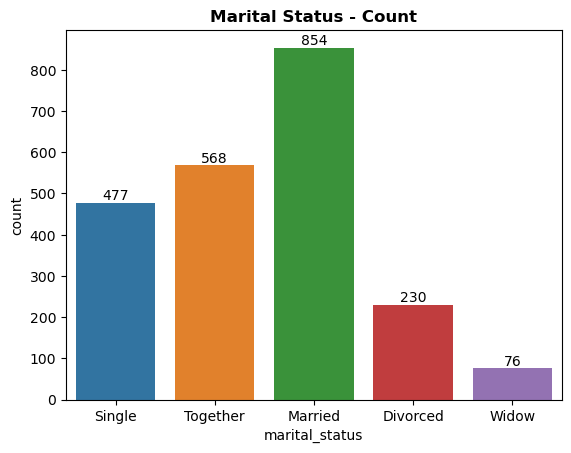

In [49]:
# plotting graph with marital status data
marital_graph = sns.barplot(data=marital_status, x='marital_status', y='count', 
                            order=['Single', 'Together', 'Married', 'Divorced', 'Widow'])
marital_graph.set_title("Marital Status - Count", fontweight='bold')

for i in marital_graph.containers:
    marital_graph.bar_label(i,)

We have a higher number of people that live together or are married.

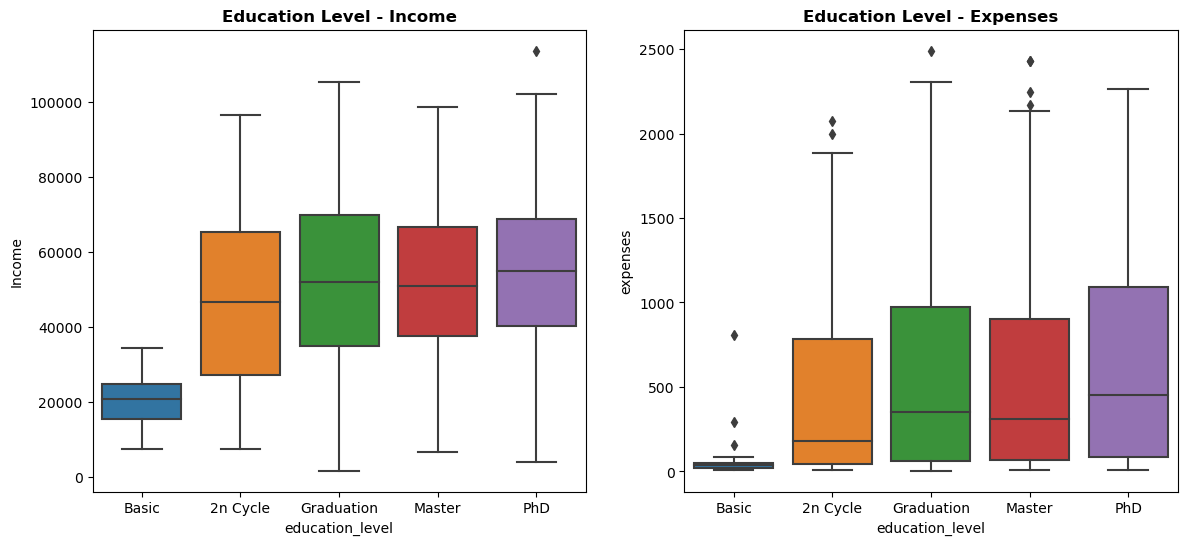

In [46]:
# plotting graphs with education level and income or expenses
fig = plt.figure(figsize=(14,6))

specs = gridspec.GridSpec(ncols=2, nrows=1,figure=fig)

ax1 = fig.add_subplot( specs[0,0]) # First row, first column
ax2 = fig.add_subplot( specs[0,1]) # First row, second column 

graph_1 = sns.boxplot(x='education_level', y='Income', data=data, 
                             order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], ax=ax1)
graph_1.set_title("Education Level - Income", fontweight='bold')

graph_2 = sns.boxplot(x='education_level', y='expenses', data=data,
                             order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], ax=ax2)
graph_2.set_title("Education Level - Expenses", fontweight='bold')


plt.show()

Regarding income and expenses, people with only basic education seem to make less money and also expend less. Besides holding some basic education group outliers on the expend data. While people with higher education level seem to have similar characteristics.  

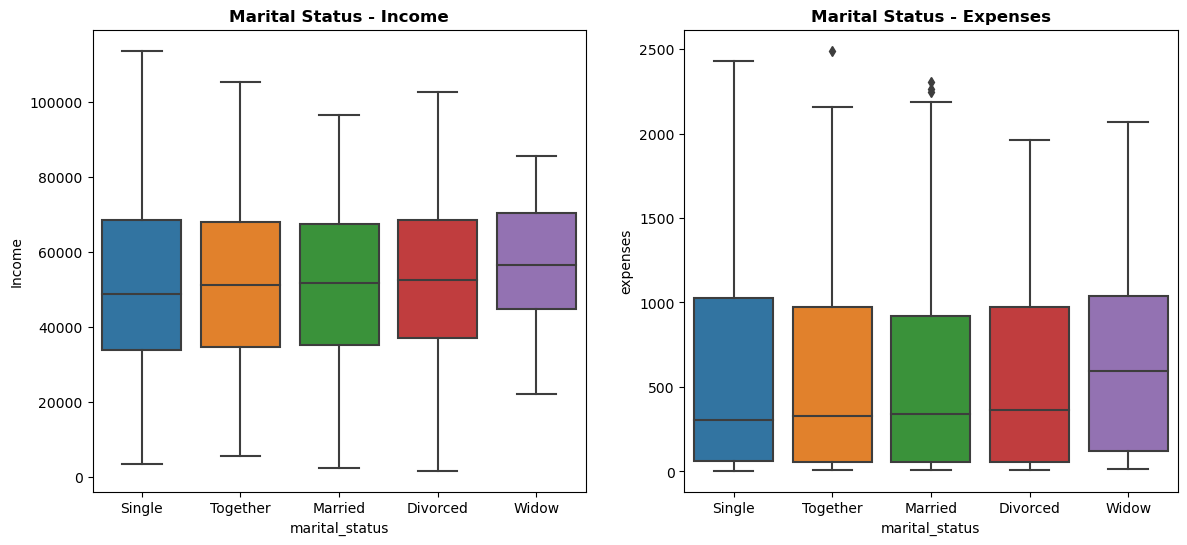

In [45]:
# plotting graphs with marital status and income or expenses
fig = plt.figure(figsize=(14,6))

specs = gridspec.GridSpec(ncols=2, nrows=1,figure=fig)

ax1 = fig.add_subplot( specs[0,0]) # First row, first columns
ax2 = fig.add_subplot( specs[0,1]) # First row, second column 

graph_1 = sns.boxplot(x='marital_status', y='Income', data=data, ax=ax1)
graph_1.set_title("Marital Status - Income", fontweight='bold')
graph_2 = sns.boxplot(x='marital_status', y='expenses', data=data, ax=ax2)
graph_2.set_title("Marital Status - Expenses", fontweight='bold')

plt.show()

Concerning marital status, both income and expend seem to be similar.

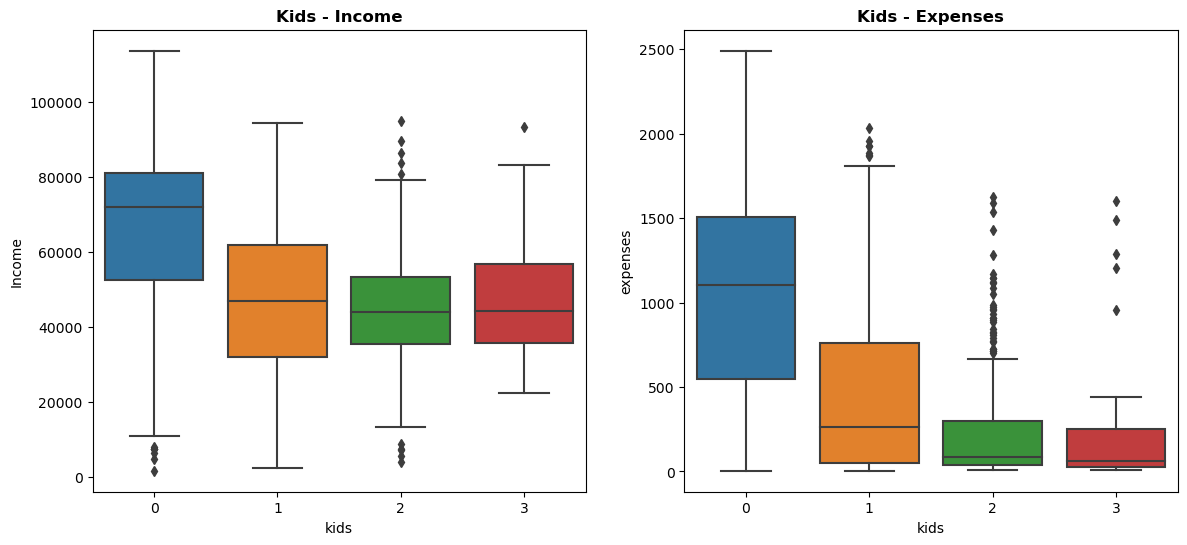

In [44]:
# plotting graphs with number of kids and income or expenses
fig = plt.figure(figsize=(14,6))

specs = gridspec.GridSpec(ncols=2, nrows=1,figure=fig)

ax1 = fig.add_subplot( specs[0,0]) # First row, first column
ax2 = fig.add_subplot( specs[0,1]) # First row, second column 

graph_1 = sns.boxplot(x='kids', y='Income', data=data, ax=ax1)
graph_1.set_title("Kids - Income", fontweight='bold')

graph_2 = sns.boxplot(x='kids', y='expenses', data=data, ax=ax2)
graph_2.set_title("Kids - Expenses", fontweight='bold')

plt.show()

* The boxplots with the children amount show that the people without kids seem to have a higher income and also spend more on the app.

* Both graphs show the presence of outliers, particularly on the expenses within the group with two kids.

In [20]:
without_kid = data.loc[data['kids'] == 0].copy().reset_index(drop=True) # dataframe of people without kids
with_kids = data.loc[data['kids'] != 0].copy().reset_index(drop=True) # dataframe of people with kids
with_one_kid = data.loc[data['kids'] == 1].copy().reset_index(drop=True) # dataframe of people with one kids
with_two_kids = data.loc[data['kids'] == 2].copy().reset_index(drop=True) # dataframe of people with two kids
with_three_kids = data.loc[data['kids'] == 3].copy().reset_index(drop=True) # dataframe of people with three kids

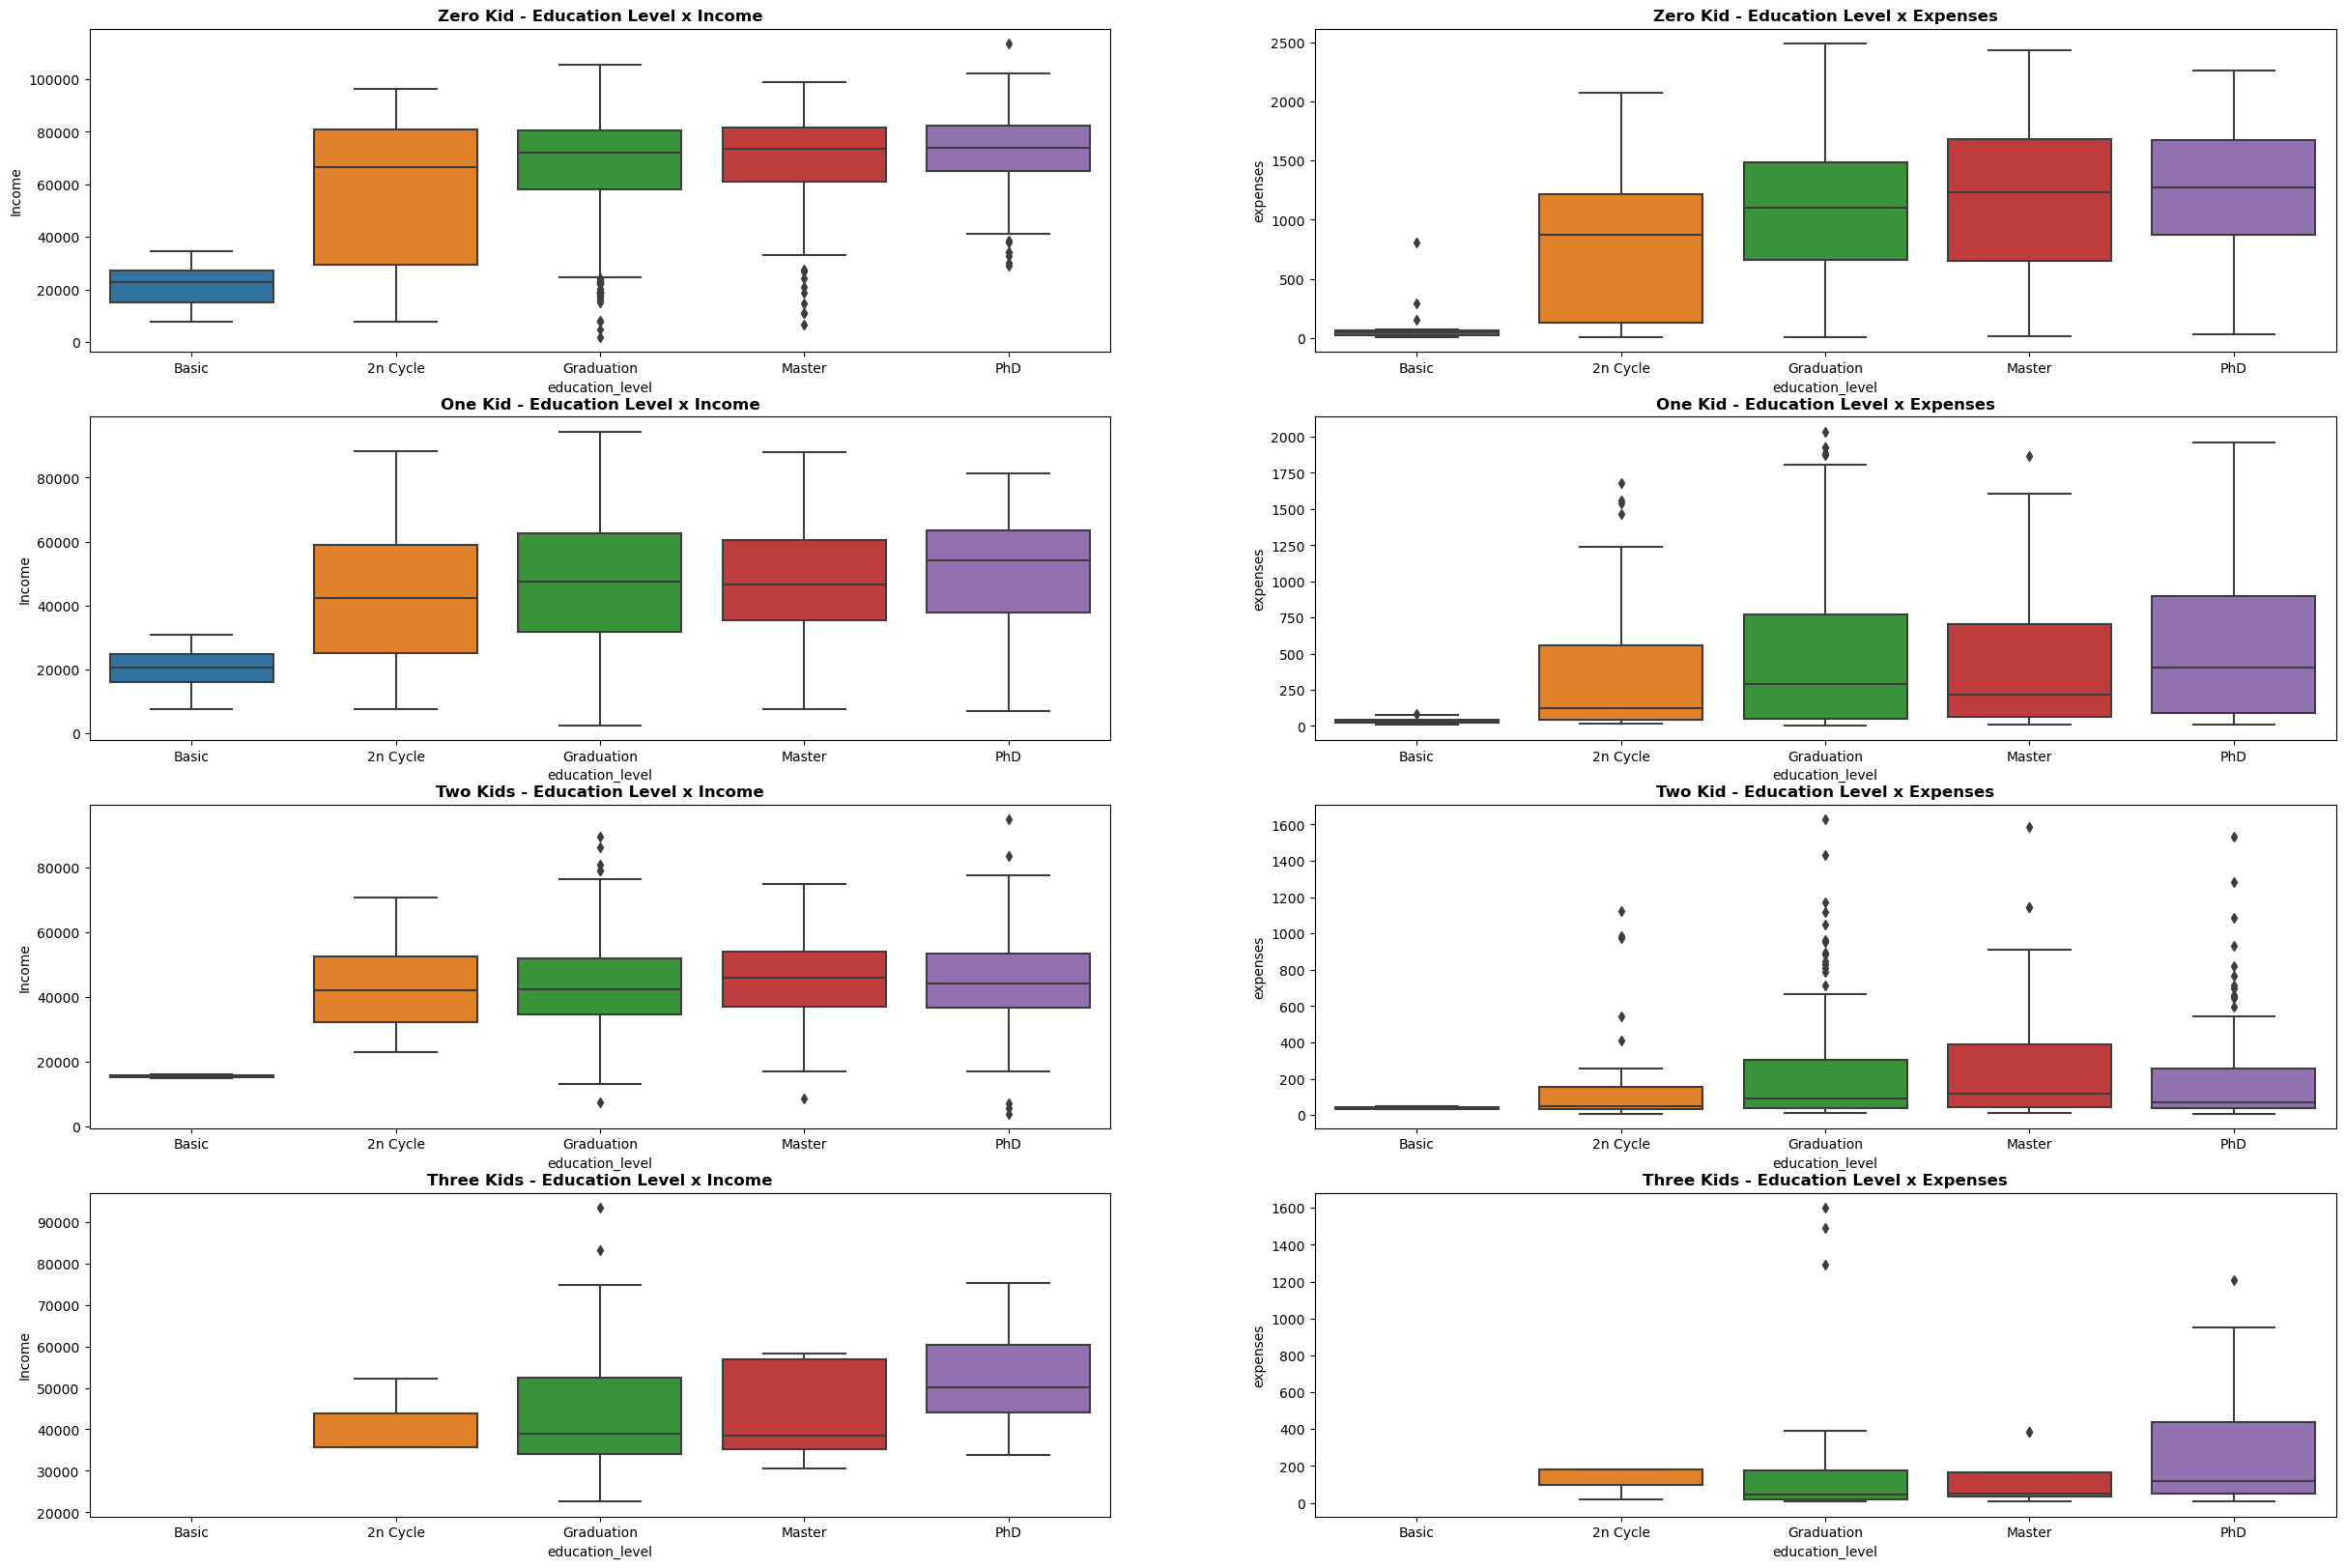

In [21]:
# plotting graphs of education level and income or expenses within the groups without kids and the people with kids
fig = plt.figure(figsize=(30,20))

specs = gridspec.GridSpec(ncols=2, nrows=4,figure=fig)

ax1 = fig.add_subplot( specs[0,0]) 
ax2 = fig.add_subplot( specs[0,1])
ax3 = fig.add_subplot( specs[1,0])
ax4 = fig.add_subplot( specs[1,1])
ax5 = fig.add_subplot( specs[2,0])
ax6 = fig.add_subplot( specs[2,1])
ax7 = fig.add_subplot( specs[3,0])
ax8 = fig.add_subplot( specs[3,1])


graph_1 = sns.boxplot(data=without_kid, x='education_level', y='Income', 
                      order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], ax=ax1)
graph_1.set_title("Zero Kid - Education Level x Income", fontweight='bold')

graph_2 = sns.boxplot(data=without_kid, x='education_level', y='expenses', 
                      order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], ax=ax2)
graph_2.set_title("Zero Kid - Education Level x Expenses", fontweight='bold')

graph_3 = sns.boxplot(data=with_one_kid, x='education_level', y='Income', 
                      order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], ax=ax3)
graph_3.set_title("One Kid - Education Level x Income", fontweight='bold')

graph_4 = sns.boxplot(data=with_one_kid, x='education_level', y='expenses', 
                      order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], ax=ax4)
graph_4.set_title("One Kid - Education Level x Expenses", fontweight='bold')

graph_5 = sns.boxplot(data=with_two_kids, x='education_level', y='Income', 
                      order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], ax=ax5)
graph_5.set_title("Two Kids - Education Level x Income", fontweight='bold')

graph_6 = sns.boxplot(data=with_two_kids, x='education_level', y='expenses', 
                      order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], ax=ax6)
graph_6.set_title("Two Kid - Education Level x Expenses", fontweight='bold')

graph_7 = sns.boxplot(data=with_three_kids, x='education_level', y='Income', 
                      order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], ax=ax7)
graph_7.set_title("Three Kids - Education Level x Income", fontweight='bold')

graph_8 = sns.boxplot(data=with_three_kids, x='education_level', y='expenses', 
                      order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], ax=ax8)
graph_8.set_title("Three Kids - Education Level x Expenses", fontweight='bold')

plt.show()

- There seems to be a big difference between people who do not have children and only have basic education and their income and expenses comparing to other groups;

- As in the general sample data, people who have a higher educational level seem to have similar characteristics when considering the number of children;

- We do not have any examples of people who only have basic education and have three children using the app.

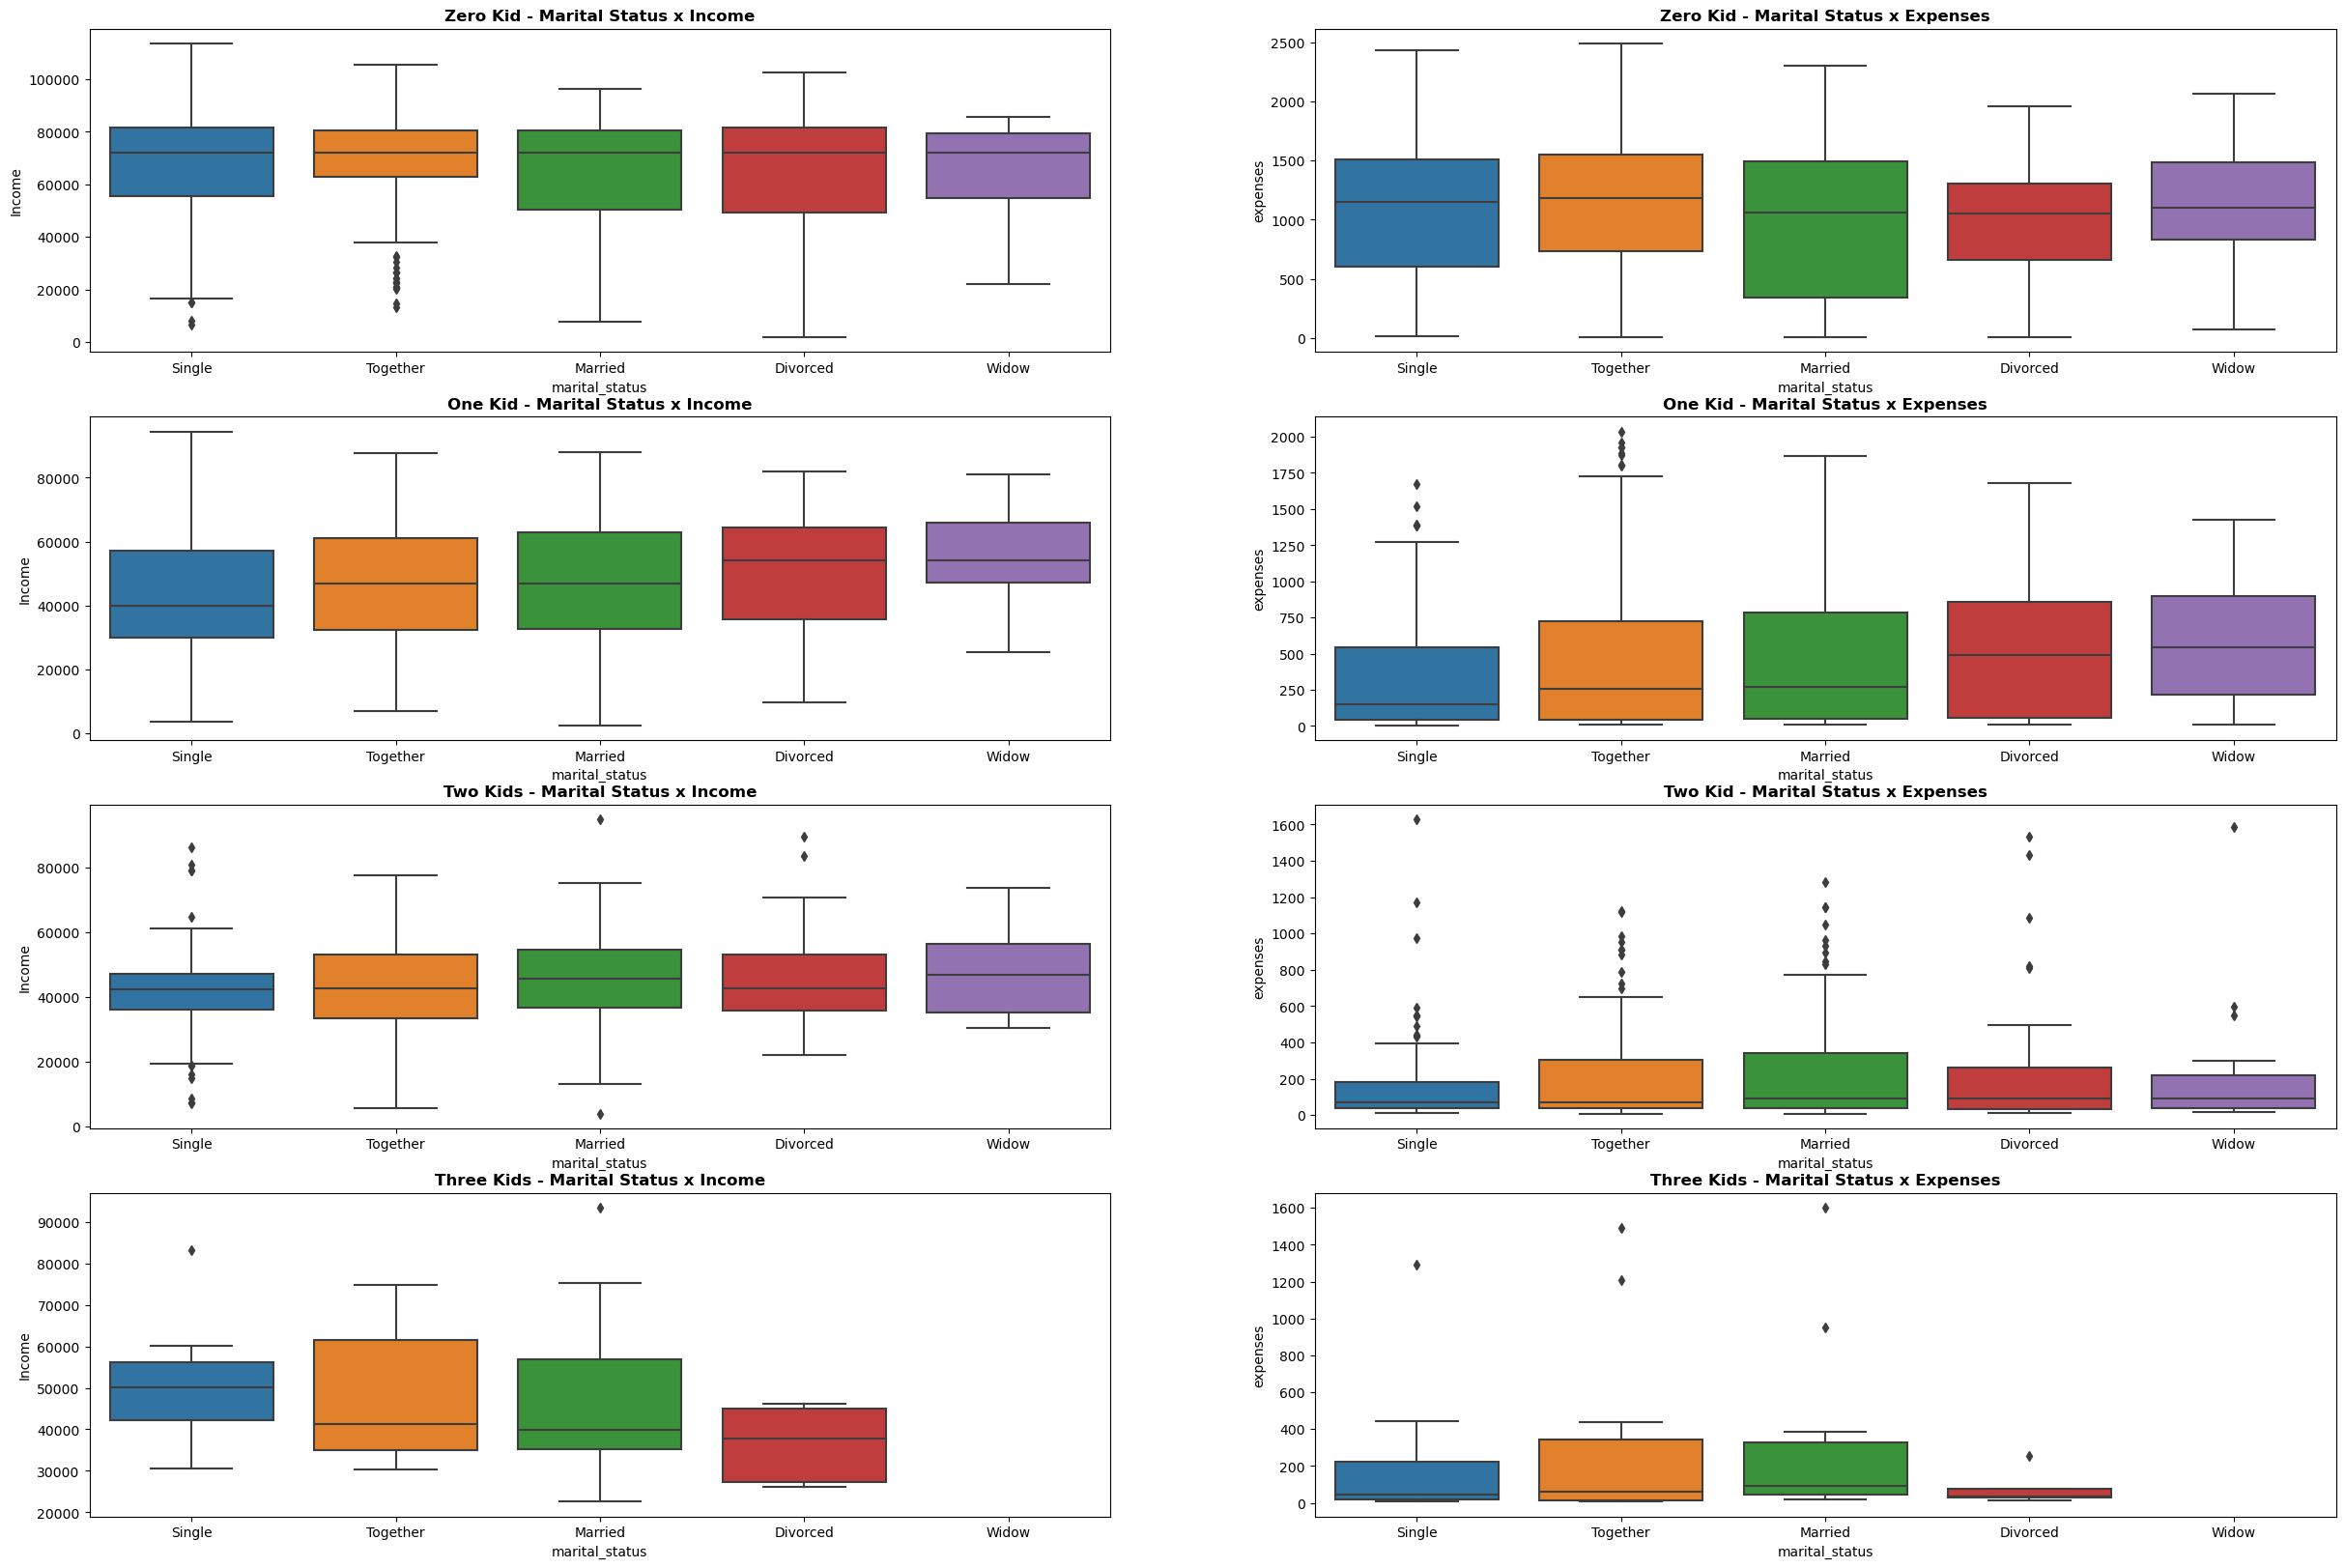

In [22]:
# plotting graphs of marital status and income or expenses within the groups without kids and the people with kids
fig = plt.figure(figsize=(30,20))

specs = gridspec.GridSpec(ncols=2, nrows=4,figure=fig)

ax1 = fig.add_subplot( specs[0,0]) 
ax2 = fig.add_subplot( specs[0,1])
ax3 = fig.add_subplot( specs[1,0])
ax4 = fig.add_subplot( specs[1,1])
ax5 = fig.add_subplot( specs[2,0])
ax6 = fig.add_subplot( specs[2,1])
ax7 = fig.add_subplot( specs[3,0])
ax8 = fig.add_subplot( specs[3,1])


graph_1 = sns.boxplot(data=without_kid, x='marital_status', y='Income', 
                      order=['Single', 'Together', 'Married', 'Divorced', 'Widow'], ax=ax1)
graph_1.set_title("Zero Kid - Marital Status x Income", fontweight='bold')

graph_2 = sns.boxplot(data=without_kid, x='marital_status', y='expenses', 
                      order=['Single', 'Together', 'Married', 'Divorced', 'Widow'], ax=ax2)
graph_2.set_title("Zero Kid - Marital Status x Expenses", fontweight='bold')

graph_3 = sns.boxplot(data=with_one_kid, x='marital_status', y='Income', 
                      order=['Single', 'Together', 'Married', 'Divorced', 'Widow'], ax=ax3)
graph_3.set_title("One Kid - Marital Status x Income", fontweight='bold')

graph_4 = sns.boxplot(data=with_one_kid, x='marital_status', y='expenses', 
                      order=['Single', 'Together', 'Married', 'Divorced', 'Widow'], ax=ax4)
graph_4.set_title("One Kid - Marital Status x Expenses", fontweight='bold')

graph_5 = sns.boxplot(data=with_two_kids, x='marital_status', y='Income', 
                      order=['Single', 'Together', 'Married', 'Divorced', 'Widow'], ax=ax5)
graph_5.set_title("Two Kids - Marital Status x Income", fontweight='bold')

graph_6 = sns.boxplot(data=with_two_kids, x='marital_status', y='expenses', 
                      order=['Single', 'Together', 'Married', 'Divorced', 'Widow'], ax=ax6)
graph_6.set_title("Two Kid - Marital Status x Expenses", fontweight='bold')

graph_7 = sns.boxplot(data=with_three_kids, x='marital_status', y='Income', 
                      order=['Single', 'Together', 'Married', 'Divorced', 'Widow'], ax=ax7)
graph_7.set_title("Three Kids - Marital Status x Income", fontweight='bold')

graph_8 = sns.boxplot(data=with_three_kids, x='marital_status', y='expenses', 
                      order=['Single', 'Together', 'Married', 'Divorced', 'Widow'], ax=ax8)
graph_8.set_title("Three Kids - Marital Status x Expenses", fontweight='bold')

plt.show()

- As in the general sample data, people seem to have similar characteristics regardless of the relationship;

- We do not have any widowed person with three children.

# Hypothesis testing

**Significance level (alpha) =** 0.05

## Comparing the average spending amount between people without kids and with kids.

**Hypothesis 1:** Average spending amount of people without kids is different of people with kids.

**H0:** avg_spending_without = avg_spending_with

**H1:** avg_spending_without != avg_spending_with

### Also I've done a hypothesis test to analyze if the income of people without kids is differente of people with kids.

**Hypothesis 2:** Average income amount of people without kids is different of people with kids.

**H0:** avg_income_without = avg_income_with

**H2:** avg_income_without != avg_income_with

In both of these tests We are comparing the means of two groups. Thus, In both of them We'll use a T-test

In order to use the T-test, the data should fill these conditions:

    1. The populational standard deviation are unknow;
    
    2. The samples are selected randomly;
    
    3. The samples are independent;
    
    4. The samples are normally distributed or each sample size is higher than 30.

In [23]:
print(f'Number of people without kids: {without_kid["row_number"].nunique()}')
print(f'Number of people with kids: {with_kids["row_number"].nunique()}')

Number of people without kids: 628
Number of people with kids: 1577


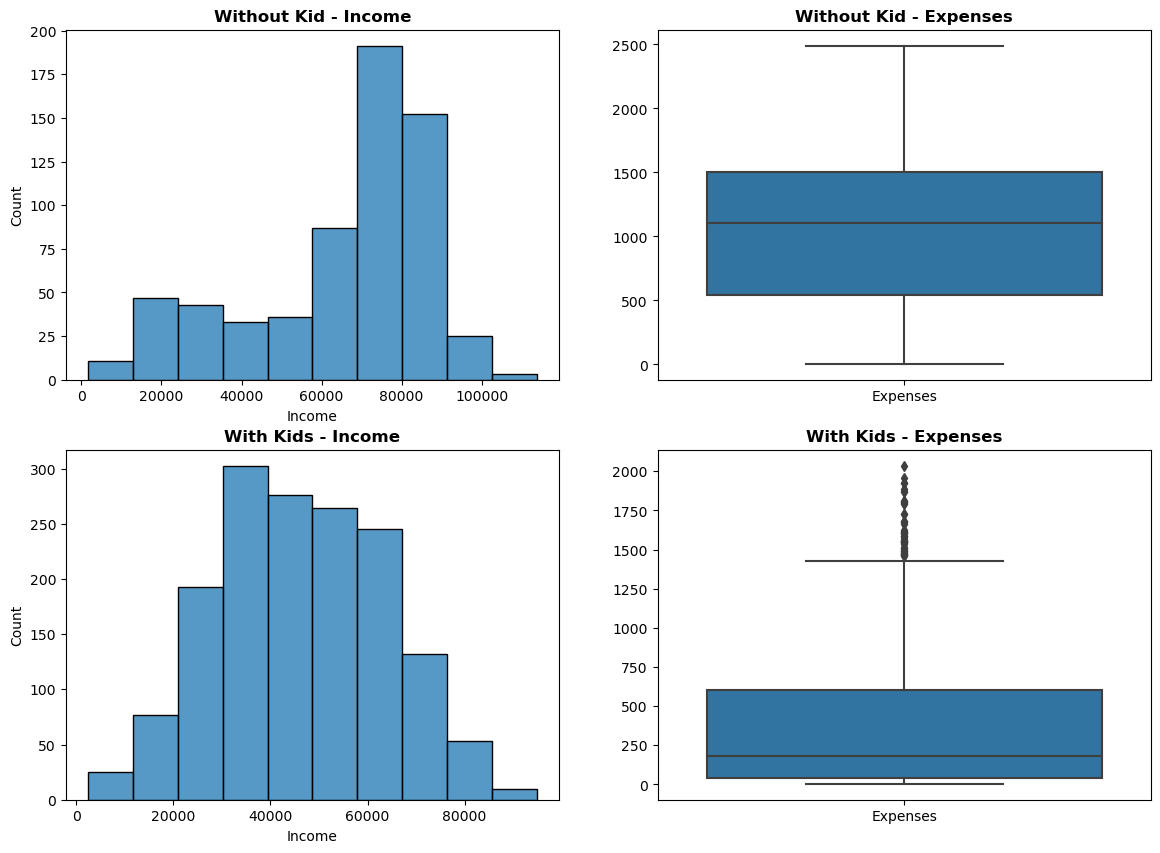

In [24]:
# Histograms and boxplots for income and expenses for both groups
fig = plt.figure(figsize=(14,10))

specs = gridspec.GridSpec(ncols=2, nrows=2,figure=fig)

ax1 = fig.add_subplot( specs[0,0]) # 
ax2 = fig.add_subplot( specs[0,1]) # 
ax3 = fig.add_subplot( specs[1,0]) # 
ax4 = fig.add_subplot( specs[1,1]) # 

graph_1 = sns.histplot(data=without_kid['Income'], bins=10, ax=ax1)
graph_1.set_title("Without Kid - Income", fontweight='bold')

graph_2 = sns.boxplot( data=without_kid['expenses'], ax=ax2)
graph_2.set_xticklabels(['Expenses'])
graph_2.set_title("Without Kid - Expenses", fontweight='bold')

graph_3 = sns.histplot(data=with_kids['Income'], bins=10, ax=ax3)
graph_3.set_title("With Kids - Income", fontweight='bold')

graph_4 = sns.boxplot( data=with_kids['expenses'], ax=ax4)
graph_4.set_xticklabels(['Expenses'])
graph_4.set_title("With Kids - Expenses", fontweight='bold')


plt.show()

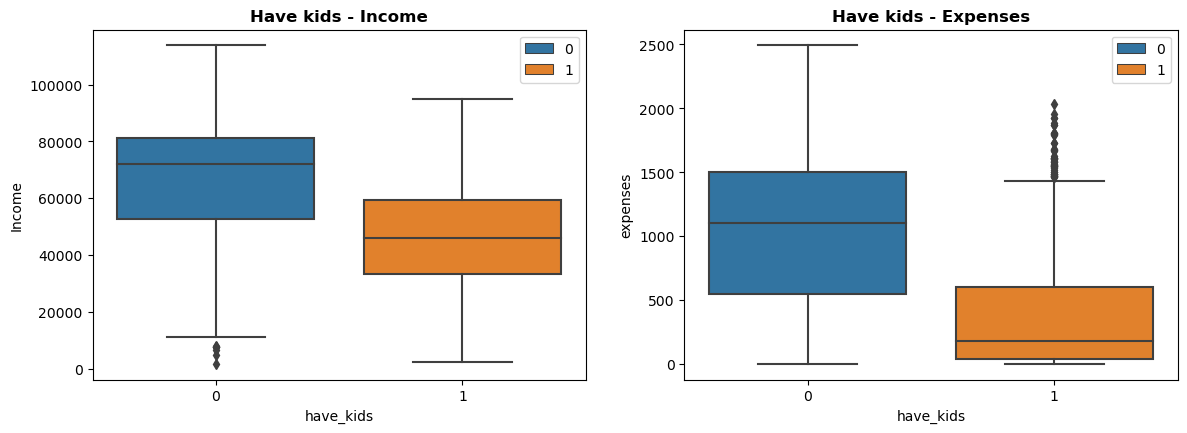

In [43]:
# Using boxplots to compare both groups income and expenses
fig = plt.figure(figsize=(14,10))

specs = gridspec.GridSpec(ncols=2, nrows=2,figure=fig)

ax1 = fig.add_subplot( specs[0,0]) # 
ax2 = fig.add_subplot( specs[0,1]) # 

graph_1 = sns.boxplot(data=data, x='have_kids', y='Income', hue='have_kids', dodge=False, ax=ax1)
graph_1.set_title("Have kids - Income", fontweight='bold')
ax1.legend(loc='upper right')
graph_2 = sns.boxplot(data=data, x='have_kids', y='expenses', hue='have_kids', dodge=False,ax=ax2)
graph_2.set_title("Have kids - Expenses", fontweight='bold')
ax2.legend(loc='upper right')

plt.show()

- People without children seem to have higher income and also more expenses;

- While people without children have an income distribution closer to normal distribution and appear to have lower expenses.

In [26]:
stats.ttest_ind(without_kid['expenses'], with_kids['expenses'])

Ttest_indResult(statistic=28.902593571564687, pvalue=5.171525024868465e-156)

In [27]:
print(f'Average spending amount of people without kid: {without_kid["expenses"].mean():.2f}')
print(f'Average spending amount of people with kids: {with_kids["expenses"].mean():.2f}')

Average spending amount of people without kid: 1041.21
Average spending amount of people with kids: 372.24


The p-value for the hypothesis test of average expenses amount is lower than our significance level. That means We have to reject the null hypothesis and We have statistical significance that the means are different.

In [28]:
stats.ttest_ind(without_kid['Income'], with_kids['Income'])

Ttest_indResult(statistic=21.132409376247416, pvalue=2.0761042540526807e-90)

In [29]:
print(f'Average income amount of people without kid: {without_kid["Income"].mean():.2f}')
print(f'Average income amount of people with kids: {with_kids["Income"].mean():.2f}')

Average income amount of people without kid: 65094.42
Average income amount of people with kids: 46257.09


The p-value for the hypothesis test of average income amount is lower than our significance level. That means We have to reject the null hypothesis and We have statistical significance that the means are different.

### **Conclusion**

The initial objective of the analysis was to prove that the average spending of people without children was different from the average spending of people with children. As our p-value was much lower than our significance level, We must therefore reject the null hypothesis that the means are equal. This way, We have statistical significant results that the means are different. In fact, We could even increase our confidence level and the result wouldn't change.

I also carried out a test to find out whether the average incomes between people who have or don't have children were the same or different. Likewise, We can reject the null hypothesis that the average incomes of these groups are equal.

## Are there differences of average spending amount between the people with kids? Which of them has the lower average?

**Hypothesis 3:** The average spending amount between groups with kids are equal.

**H0:** avg_espending_one_kid = avg_espending_two_kids = avg_espending_three_kids

**H1:** avg_espending_one_kid != avg_espending_two_kids != avg_espending_three_kids

### After this test, We'll be able to know if the means are equal or not, but We also want to explore the differences between these groups, in case there are differences between the means.

We have three groups to compare among people who have children. This way, we can use a One-Way ANOVA test, but we need to follow the following assumptions:

    1. Random samples
    2. Independent groups
    3. The dependent variable is continuous
    4. Each group must have at least 15 observations
    5. Variances between groups must be equal.

In [30]:
with_kids['kids'].value_counts()

1    1112
2     415
3      50
Name: kids, dtype: int64

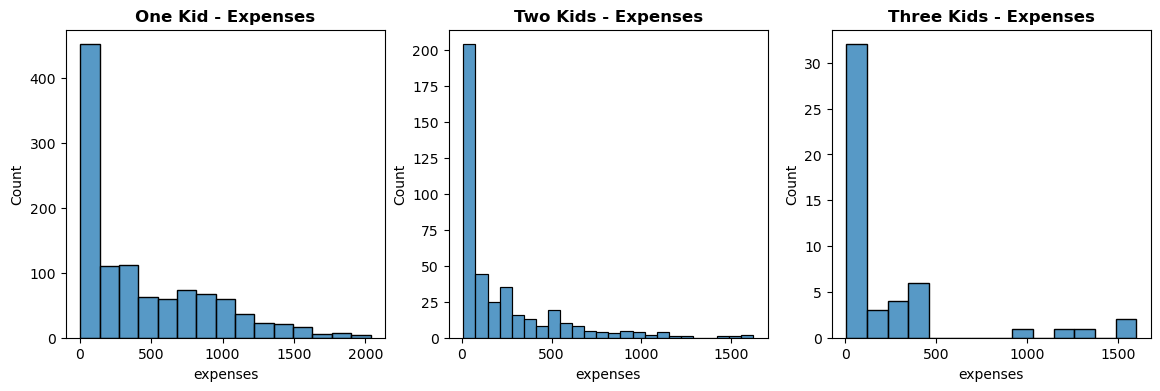

In [50]:
fig = plt.figure(figsize=(14,4))

specs = gridspec.GridSpec(ncols=3, nrows=1,figure=fig)

ax1 = fig.add_subplot( specs[0,0]) # 
ax2 = fig.add_subplot( specs[0,1]) # 
ax3 = fig.add_subplot( specs[0,2]) # 

graph_1 = sns.histplot(data=with_one_kid['expenses'], ax=ax1)
graph_1.set_title('One Kid - Expenses', fontweight='bold')

graph_2 = sns.histplot(data=with_two_kids['expenses'], ax=ax2) 
graph_2.set_title('Two Kids - Expenses', fontweight='bold')

graph_3 = sns.histplot(data=with_three_kids['expenses'], ax=ax3)
graph_3.set_title('Three Kids - Expenses', fontweight='bold')

plt.show()

In [31]:
# We perform a Bartlett test to make sure the variances are equal or not.
stats.bartlett(with_kids['expenses'].loc[with_kids['kids'] == 1],
               with_kids['expenses'].loc[with_kids['kids'] == 2],
               with_kids['expenses'].loc[with_kids['kids'] == 3])

BartlettResult(statistic=102.2171977024388, pvalue=6.365280420289193e-23)

As the p-value was smaller than our alpha, We must reject the null hypothesis that We have equal variances. Therefore, We won't be able to use the One-Way ANOVA test and We'll perform a Welch ANOVA test.

In [32]:
pg.welch_anova(dv='expenses', between='kids', data=with_kids) 

,Source,ddof1,ddof2,F,p-unc,np2
0,kids,2,132.724442,59.721904,3.178541e-19,0.051464


Just out of curiosity, I've also tested average income amount. 

In [33]:
pg.welch_anova(dv='Income', between='kids', data=with_kids) 

,Source,ddof1,ddof2,F,p-unc,np2
0,kids,2,133.230305,4.383318,0.014334,0.004493


### **Conclusion**

The overall p-value (p-unc) is much lower than our alpha. Therefore, We reject the null hypothesis that the groups are equal and We have statistical significant results to infer that there is a difference in spending among people with different numbers of children.

Similarly to the test conducted between the spending and income averages of people with and without children, I also performed the Welch's ANOVA test to verify if there is a difference in income among people with children. At a 95% confidence level, we also have a difference in income among people with children.

After confirming that there is a difference, we can conduct a Post Hoc test to better understand the differences between the tested groups.

In this case, we will use a Games Howell Post Hoc test to better understand the differences between the groups with children. We'll use a Games Howell test because We don't have a normal distribution, equal variances and same size of samples.

In [76]:
pg.pairwise_gameshowell(dv='expenses', between='kids', data=with_kids)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,1,2,434.530576,221.568675,212.961901,19.678256,10.822194,1152.588538,2.596812e-13,0.513077
1,1,3,434.530576,237.380000,197.150576,56.823741,3.469511,55.099957,2.888048e-03,0.437688
2,2,3,221.568675,237.380000,-15.811325,56.988869,-0.277446,55.722906,9.584865e-01,-0.052201


Likewise, just out of curiosity, I've performed a test to explore the differences between groups income amount average.

In [77]:
pg.pairwise_gameshowell(dv='Income', between='kids', data=with_kids)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,1,2,46957.959532,44328.491566,2629.467966,891.030857,2.951040,935.508582,0.009097,0.152406
1,1,3,46957.959532,46677.000000,280.959532,2238.478377,0.125514,55.385834,0.991354,0.015516
2,2,3,44328.491566,46677.000000,-2348.508434,2282.207694,-1.029051,59.774480,0.561627,-0.162216


**Conclusion**

Regarding the difference between expenses, after conducting the Games Howell test, we found that there is a difference between the groups 1-2 and 1-3, and there is no difference between groups 2-3, as their p-value was greater than our significance level of 0.05.

As for the difference between incomes, only groups 1-2 are different, while there is no difference in income between groups  1-3, as well as between groups 2-3.

## Recommendations

After this analysis, the Marketing team can:
    
    - Indeed, the average speding amount among groups with and without kids are different. Thus, They can create different campaigns;
    - Groups with 2 and 3 kids have a lower expense average comparing to group with only 1 kid. Marketing team can focus on both of them aiming the increase of their spending amount;